### Primero se importan las bibliotecas necesarias

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

### Funciones utiles

In [46]:
import numpy as np
import os

def analizar_categorias(dataframe):    
    categorias_histograma = dataframe.groupby('categories').size().sort_values(ascending=False)
    len(categorias_histograma)

    categorias_unicas = {}
    for index, cantidad in categorias_histograma.items():
        for categoria in index.split(','):
            if categoria in categorias_unicas:
                categorias_unicas[categoria] += cantidad
            else:
                categorias_unicas[categoria] = cantidad

    categorias_unicas_ordenadas = dict(sorted(categorias_unicas.items(), key=lambda x: x[1], reverse=True))
    return categorias_unicas_ordenadas

def plot_categories_distribution(categorias_dict, title="Distribución de Categorías", top_n=20):
    """
    Plot a horizontal bar chart for categories distribution
    
    Parameters:
    categorias_dict: dict with category names as keys and counts as values
    title: str, title for the plot
    top_n: int, number of top categories to show
    """
    # Get top N categories (already sorted in descending order)
    top_categories = list(categorias_dict.keys())[:top_n]
    top_values = list(categorias_dict.values())[:top_n]
    
    # Calculate "Otros" (other categories)
    total_top_values = sum(top_values)
    total_all_values = sum(categorias_dict.values())
    otros_value = total_all_values - total_top_values
    
    # Add "Otros" to the data if there are remaining categories
    if otros_value > 0:
        plot_categories = top_categories + ['Otros']
        plot_values = top_values + [otros_value]
    else:
        plot_categories = top_categories
        plot_values = top_values
    
    # Create horizontal bar plot
    plt.figure(figsize=(12, 8))
    colors = ['#4ECDC4'] * len(top_categories) + (['#FF6B6B'] if otros_value > 0 else [])
    bars = plt.barh(range(len(plot_categories)), plot_values, 
                    color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Número de Items', fontsize=14, fontweight='bold')
    plt.ylabel('Categorías', fontsize=14, fontweight='bold')
    
    # Set y-axis ticks and labels
    plt.yticks(range(len(plot_categories)), plot_categories, fontsize=10)
    
    # Reverse y-axis to show highest values at top
    plt.gca().invert_yaxis()
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, plot_values)):
        width = bar.get_width()
        plt.text(width + max(plot_values) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,}', ha='left', va='center', 
                fontweight='bold', fontsize=10)
        
        # Add percentage labels
        percentage = (value / total_all_values) * 100
        plt.text(width/2, bar.get_y() + bar.get_height()/2,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
    
    # Styling
    plt.grid(True, alpha=0.3, axis='x')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')
    
    # Format x-axis with comma separator
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    plt.tight_layout()
    # Save the figure
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_rating_distribution(ratings, texto_titulo):
    # Count the frequency of each rating
    rating_counts = ratings.value_counts().sort_index()
    
    # Check if there are more than 5 unique values
    if len(rating_counts) > 5:
        plt.figure(figsize=(12, 6))
        bars = plt.bar(rating_counts.index, rating_counts.values, 
                    alpha=0.8, edgecolor='white', linewidth=1.5)
    else:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(rating_counts.index, rating_counts.values, 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'], 
                    alpha=0.8, edgecolor='white', linewidth=1.5)

    title = f'Distribución de Ratings {texto_titulo}'
    plt.title(title, 
            fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Rating', fontsize=14, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')

    # Customize x-axis - keep ticks for all values
    if len(rating_counts) <= 5:
        plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=12)
    else:
        plt.xticks(rating_counts.index, [str(x) for x in rating_counts.index], fontsize=12)

    # Add value labels on bars with better formatting
    for i, (bar, count) in enumerate(zip(bars, rating_counts.values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(rating_counts.values) * 0.01,
                f'{count:,}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11)
        
        # Add percentage labels
        percentage = (count / rating_counts.sum()) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=10, color='black')

    # Styling
    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

    plt.tight_layout()
    # Save the figure
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_long_tail_distribution(data, title, xlabel, ylabel, top_n=20):
    """
    Plot a long tail distribution showing the top N categories and summarizing the rest
    
    Parameters:
    data: dict or Series with category names as keys/index and counts as values
    title: str, title for the plot
    xlabel: str, label for x-axis
    ylabel: str, label for y-axis
    top_n: int, number of top categories to show individually
    """
    if isinstance(data, dict):
        sorted_data = dict(sorted(data.items(), key=lambda x: x[0], reverse=False))
    else:
        sorted_data = data.sort_index()
    
    # Get top N categories
    top_categories = list(sorted_data.keys())[:top_n] if isinstance(data, dict) else sorted_data.index[:top_n]
    top_values = list(sorted_data.values())[:top_n] if isinstance(data, dict) else sorted_data.values[:top_n]
        
    # Prepare data for plotting
    plot_categories = list(top_categories)
    plot_values = list(top_values)
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    bars = plt.bar(range(len(plot_categories)), plot_values, 
                    color=['#FF6B6B' if i == len(plot_categories) else '#4ECDC4' for i in range(len(plot_categories))],
                    alpha=0.8, edgecolor='white', linewidth=1.5)
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold')
    
    # Set x-axis ticks and labels - show all categories
    plt.xticks(range(len(plot_categories)), plot_categories, rotation=45, ha='right', fontsize=10)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, plot_values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(plot_values) * 0.01,
                f'{value:,}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
        
        # Add percentage labels
        percentage = (value / sum(plot_values)) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='white')
    
    # Styling
    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    plt.tight_layout()
    # Save the figure
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_ratings_over_time(dataframe, title="Distribución de Ratings a lo largo del tiempo"):
    """
    Plot a bar plot of ratings distribution over years with average ratings displayed
    
    Parameters:
    dataframe: DataFrame with 'rating' and 'timestamp' columns
    title: str, title for the plot
    """
    import matplotlib.pyplot as plt
    
    # Convert timestamp to datetime
    df_copy = dataframe.copy()
    df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
    df_copy['year'] = df_copy['timestamp'].dt.year
    
    # Count ratings by year and calculate average rating by year
    ratings_by_year = df_copy.groupby('year').size()
    avg_rating_by_year = df_copy.groupby('year')['rating'].mean()
    
    # Create the bar plot
    plt.figure(figsize=(15, 8))
    
    bars = plt.bar(ratings_by_year.index, ratings_by_year.values, 
                   color='#4ECDC4', alpha=0.8, edgecolor='white', linewidth=1.5)
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Año', fontsize=14, fontweight='bold')
    plt.ylabel('Número de Ratings', fontsize=14, fontweight='bold')
    
    # Add value labels on bars and average ratings in the middle
    for i, bar in enumerate(bars):
        year = ratings_by_year.index[i]
        height = bar.get_height()
        avg_rating = avg_rating_by_year[year]
        
        # Count label on top
        plt.text(bar.get_x() + bar.get_width()/2., height + max(ratings_by_year.values) * 0.01,
                f'{int(height):,}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11)
        
        # Average rating label in the middle
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{avg_rating:.2f}', ha='center', va='center', 
                fontweight='bold', fontsize=10, color='white')
    
    # Styling
    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')
    
    # Format y-axis with comma separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Rotate x-axis labels if there are many years
    if len(ratings_by_year) > 10:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    # Save the figure
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_price_vs_rating(dataframe, title="Relación entre Precio y Rating"):
    """
    Plot a scatter plot of price vs average rating
    
    Parameters:
    dataframe: DataFrame with 'price' and 'average_rating' columns
    title: str, title for the plot
    """
    import matplotlib.pyplot as plt
    
    # Separate data with and without price
    df_with_price = dataframe.dropna(subset=['price'])
    df_without_price = dataframe[dataframe['price'].isna()]
    
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot for items with price (blue)
    plt.scatter(df_with_price['price'], df_with_price['average_rating'], 
                alpha=0.6, s=30, color='#4ECDC4', edgecolors='white', linewidth=0.5, 
                label=f'Con precio ({len(df_with_price):,} items)')
    
    # Create scatter plot for items without price (green) - place them at x=0
    if len(df_without_price) > 0:
        plt.scatter([0] * len(df_without_price), df_without_price['average_rating'], 
                    alpha=0.6, s=30, color='#2ECC71', edgecolors='white', linewidth=0.5,
                    label=f'Sin precio ({len(df_without_price):,} items)')
    
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Precio ($)', fontsize=14, fontweight='bold')
    plt.ylabel('Rating Promedio', fontsize=14, fontweight='bold')
    
    # Set axis limits
    plt.xlim(-10, 400)
    plt.ylim(0.5, 5.5)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Calculate and display correlation coefficient (only for items with price)
    if len(df_with_price) > 1:
        correlation = df_with_price['price'].corr(df_with_price['average_rating'])
        plt.text(0.02, 0.98, f'Correlación: {correlation:.3f}', 
                    transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add trend line (only for items with price)
        z = np.polyfit(df_with_price['price'], df_with_price['average_rating'], 1)
        p = np.poly1d(z)
        plt.plot(df_with_price['price'].sort_values(), 
                    p(df_with_price['price'].sort_values()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Tendencia')
    
    plt.legend()
    
    # Styling
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')
    
    plt.tight_layout()
    # Save the figure
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()
    
    # Print some statistics
    print(f"Número de items con precio: {len(df_with_price):,}")
    if len(df_with_price) > 0:
        print(f"Precio promedio: ${df_with_price['price'].mean():.2f}")
        print(f"Rating promedio (con precio): {df_with_price['average_rating'].mean():.2f}")
        correlation = df_with_price['price'].corr(df_with_price['average_rating'])
        print(f"Correlación precio-rating: {correlation:.3f}")
    
    print(f"Número de items sin precio: {len(df_without_price):,}")
    if len(df_without_price) > 0:
        print(f"Rating promedio (sin precio): {df_without_price['average_rating'].mean():.2f}")

### Primero se cargan los datos necesarios

In [47]:
train_data = pd.read_csv("datos/train.csv")
validation_data = pd.read_csv("datos/validation.csv")
train_data.head()


,rating,review_title,text,user_id,timestamp,item_title,item_id
0,5.0,One of my favorites !,Great game in the series !,149157,2017-11-13 10:53:02.745,Medal of Honor - PC,4946
1,5.0,Five Stars,Thanks.,773830,2018-02-21 00:28:38.152,Skylanders Imaginators - Crash Bandicoot Editi...,1451
2,5.0,Almost perfect...,Likes:<br />Smaller and lighter than the origi...,684350,2021-05-30 23:57:05.474,Retro Fighters StrikerDC Dreamcast Controller ...,39371
3,5.0,Five Stars,like it,524397,2017-04-12 22:33:32.000,Skylanders SuperChargers: Vehicle Burn Cycle C...,1440
4,5.0,Great game,A huge hit at my household. Nice job!,310221,2019-04-03 20:32:43.047,Yoshi's Crafted World - Nintendo Switch [Digit...,2869


In [48]:
vg_data = pd.read_csv("datos/videogames_metadata.csv")
vg_data.head()

,title,average_rating,rating_number,features,description,price,store,categories,item_id,image
0,Dash 8-300 Professional Add-On,5.0,1,"""Features Dash 8-300 and 8-Q300 (Q rollout liv...",The Dash 8-300 Professional Add-On lets you pi...,NaN,Aerosoft,"PC, Games",118568,https://m.media-amazon.com/images/I/21DVWE41A0...
1,Phantasmagoria: A Puzzle of Flesh,4.1,18,Windows 95,NaN,NaN,Sierra,"PC, Games",35295,https://m.media-amazon.com/images/I/51pqAznTA9...
2,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,The #1 rated NBA video game simulation series ...,Following the record-breaking launch of NBA 2K...,58.00,2K,"PlayStation 4, Games",2884,https://m.media-amazon.com/images/I/51wlIPcf0g...
3,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,Authentic Nintendo Selects: The Legend of Zeld...,NaN,37.42,Amazon Renewed,"Legacy Systems, Nintendo Systems, Nintendo 3D...",106166,https://m.media-amazon.com/images/I/51raO0wAe8...
4,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,Includes (9) Total Accessories Pedometer Wii...,The Thrustmaster Motion Plus Elite Fitness Pac...,NaN,THRUSTMASTER,"Legacy Systems, Nintendo Systems, Wii, Access...",93217,https://m.media-amazon.com/images/I/31spO9JKlu...


In [49]:
vg_data["price"].describe()

count    38580.000000
mean        51.174594
std         89.392353
min          0.000000
25%         14.950000
50%         28.000000
75%         50.090000
max       3359.990000
Name: price, dtype: float64

### Cantidad de datos

In [50]:
# Numero de usuarios únicos en train y validation
cantidad_ratings_train = len(train_data)
numero_usuarios_train = train_data['user_id'].nunique()
cantidad_ratings_validation = len(validation_data)
numero_usuarios_validation = validation_data['user_id'].nunique()
print("Número de ratings en train:", cantidad_ratings_train)
print("Número de usuarios únicos en train:", numero_usuarios_train)
print("Número de ratings en validation:", cantidad_ratings_validation)
print("Número de usuarios únicos en validation:", numero_usuarios_validation)

# Se verifica que sean los mismos usuarios
print(f"Son los mismos usuarios?: {train_data['user_id'].unique().sort() == validation_data['user_id'].unique().sort()}")


Número de ratings en train: 68584
Número de usuarios únicos en train: 5814
Número de ratings en validation: 22861
Número de usuarios únicos en validation: 5814
Son los mismos usuarios?: True


In [51]:
# Numero de items en train
numero_items_train = train_data['item_id'].nunique()
print("Número de items en train:", numero_items_train)

# Numero de items en validation
numero_items_validation = validation_data['item_id'].nunique()
print("Número de items en validation:", numero_items_validation)

# Numero de items en total
numero_items = vg_data['item_id'].nunique()
print("Número de items totales:", numero_items)

elementos_validacion = validation_data['item_id'].unique().tolist()
elememtos_train = train_data['item_id'].unique().tolist()
contador = 0
for elemento in elementos_validacion:
    if elemento in elememtos_train:
        contador += 1
print("Número de items en validación que están en train:", contador, str(round((contador/len(elememtos_train))*100,1)) + "%")
        


Número de items en train: 16846
Número de items en validation: 9246
Número de items totales: 81255
Número de items en validación que están en train: 6849 40.7%
Número de items en validación que están en train: 6849 40.7%


### Promedios de ratings

In [52]:
# Promedio de cantidad de ratings por usuario en train
cantidad_ratings_usuario_train = train_data.groupby('user_id').size()
promedio_ratings_usuario = round(cantidad_ratings_usuario_train.mean(), 1)
std_ratings_usuario = round(cantidad_ratings_usuario_train.std(), 1)
print("Promedio de ratings por usuario en train:", promedio_ratings_usuario)
print("Desviación estándar de ratings por usuario en train:", std_ratings_usuario)

# Promedio de cantidad de ratings por usuario en validation
cantidad_ratings_usuario_validation = validation_data.groupby('user_id').size()
promedio_ratings_usuario_validation = round(cantidad_ratings_usuario_validation.mean(), 1)
std_ratings_usuario_validation = round(cantidad_ratings_usuario_validation.std(), 1)
print("Promedio de ratings por usuario en validation:", promedio_ratings_usuario_validation)
print("Desviación estándar de ratings por usuario en validation:", std_ratings_usuario_validation)

Promedio de ratings por usuario en train: 11.8
Desviación estándar de ratings por usuario en train: 2.4
Promedio de ratings por usuario en validation: 3.9
Desviación estándar de ratings por usuario en validation: 0.8


In [53]:
# Promedio de ratings por item en train
cantidad_ratings_item_train = train_data.groupby('item_id').size()
promedio_ratings_item = round(cantidad_ratings_item_train.mean(), 1)
std_ratings_item = round(cantidad_ratings_item_train.std(), 1)
print("Promedio de ratings por item en train:", promedio_ratings_item)
print("Desviación estándar de ratings por item en train:", std_ratings_item)

# Promedio de ratings por item en validation
cantidad_ratings_item_validation = validation_data.groupby('item_id').size()
promedio_ratings_item_validation = round(cantidad_ratings_item_validation.mean(), 1)
std_ratings_item_validation = round(cantidad_ratings_item_validation.std(), 1)
print("Promedio de ratings por item en validation:", promedio_ratings_item_validation)
print("Desviación estándar de ratings por item en validation:", std_ratings_item_validation)

Promedio de ratings por item en train: 4.1
Desviación estándar de ratings por item en train: 8.6
Promedio de ratings por item en validation: 2.5
Desviación estándar de ratings por item en validation: 3.8


In [54]:
# Promedio de todos los ratings en train
promedio_rating_train = round(train_data['rating'].mean(), 2)
std_rating_train = round(train_data['rating'].std(), 2)
print("Promedio de todos los ratings en train:", promedio_rating_train)
print("Desviación estándar de todos los ratings en train:", std_rating_train)

# Promedio de todos los ratings en validation
promedio_rating_validation = round(validation_data['rating'].mean(), 2)
std_rating_validation = round(validation_data['rating'].std(), 2)
print("Promedio de todos los ratings en validation:", promedio_rating_validation)
print("Desviación estándar de todos los ratings en validation:", std_rating_validation)

# Promedio de todos los ratings en train, por item
promedio_rating_item_train = round(train_data.groupby('item_id')['rating'].mean().mean(), 2)
std_rating_item_train = round(train_data.groupby('item_id')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en train, por item:", promedio_rating_item_train)
print("Desviación estándar de todos los ratings en train, por item:", std_rating_item_train)

# Promedio de todos los ratings en validation, por item
promedio_rating_item_validation = round(validation_data.groupby('item_id')['rating'].mean().mean(), 2)
std_rating_item_validation = round(validation_data.groupby('item_id')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en validation, por item:", promedio_rating_item_validation)
print("Desviación estándar de todos los ratings en validation, por item:", std_rating_item_validation)


Promedio de todos los ratings en train: 4.27
Desviación estándar de todos los ratings en train: 1.16
Promedio de todos los ratings en validation: 4.27
Desviación estándar de todos los ratings en validation: 1.16
Promedio de todos los ratings en train, por item: 4.2
Desviación estándar de todos los ratings en train, por item: 1.01
Promedio de todos los ratings en validation, por item: 4.23
Desviación estándar de todos los ratings en validation, por item: 1.05


### Valores extremos

In [55]:
# Cantidad maxima de ratings por un usuario en train
cantidad_maxima_ratings_usuario_train = cantidad_ratings_usuario_train.max()
print("Cantidad máxima de ratings por un usuario en train:", cantidad_maxima_ratings_usuario_train)

# Cantidad maxima de ratings por un usuario en validation
cantidad_maxima_ratings_usuario_validation = cantidad_ratings_usuario_validation.max()
print("Cantidad máxima de ratings por un usuario en validation:", cantidad_maxima_ratings_usuario_validation)

# Cantidad maxima de ratings a un item en train
cantidad_maxima_ratings_item_train = cantidad_ratings_item_train.max()
print("Cantidad máxima de ratings a un item en train:", cantidad_maxima_ratings_item_train)

# Cantidad maxima de ratings a un item en validation
cantidad_maxima_ratings_item_validation = cantidad_ratings_item_validation.max()
print("Cantidad máxima de ratings a un item en validation:", cantidad_maxima_ratings_item_validation)


Cantidad máxima de ratings por un usuario en train: 18
Cantidad máxima de ratings por un usuario en validation: 6
Cantidad máxima de ratings a un item en train: 248
Cantidad máxima de ratings a un item en validation: 80


### Densidad matrices

In [56]:
# Densidad en train
densidad_train = (cantidad_ratings_train/(numero_usuarios_train * numero_items_train))*100
densidad_validation = (cantidad_ratings_validation/(numero_usuarios_validation * numero_items_validation))*100
print("Densidad en train:", round(densidad_train, 4),"%")
print("Densidad en validation:", round(densidad_validation, 4),"%")

Densidad en train: 0.07 %
Densidad en validation: 0.0425 %


### Graficos

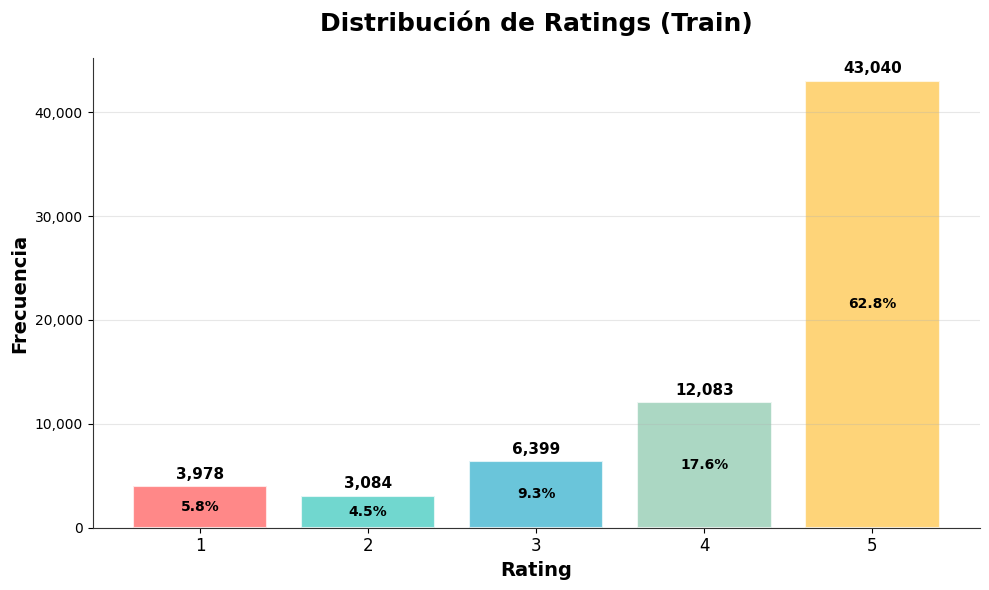

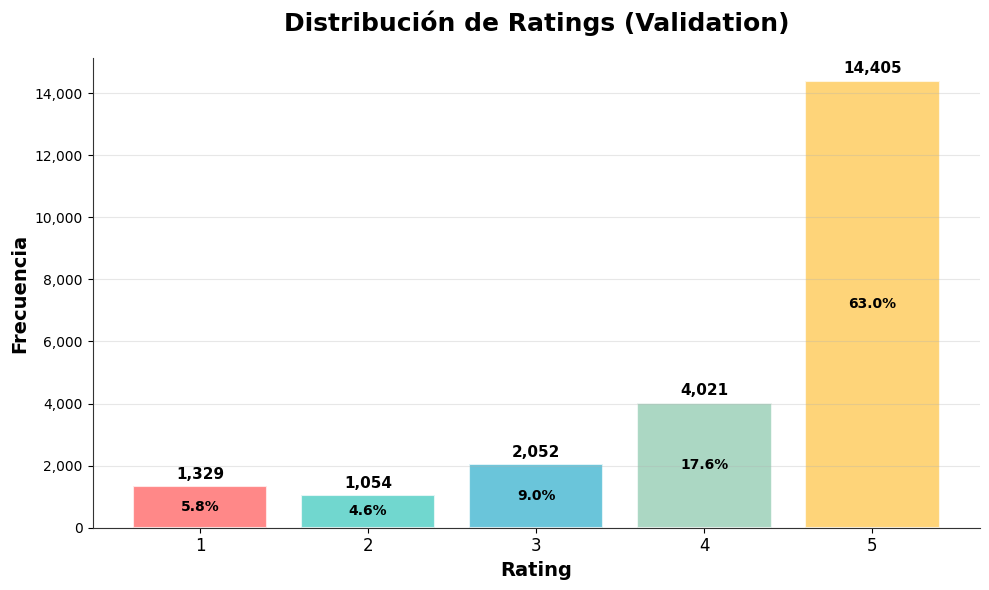

In [57]:
# Distribucion de ratings en train y validation
ratings_train = train_data["rating"]
ratings_validation = validation_data["rating"]
for ratings in [ratings_train, ratings_validation]:
    plot_rating_distribution(ratings, "(Train)" if ratings is ratings_train else "(Validation)")

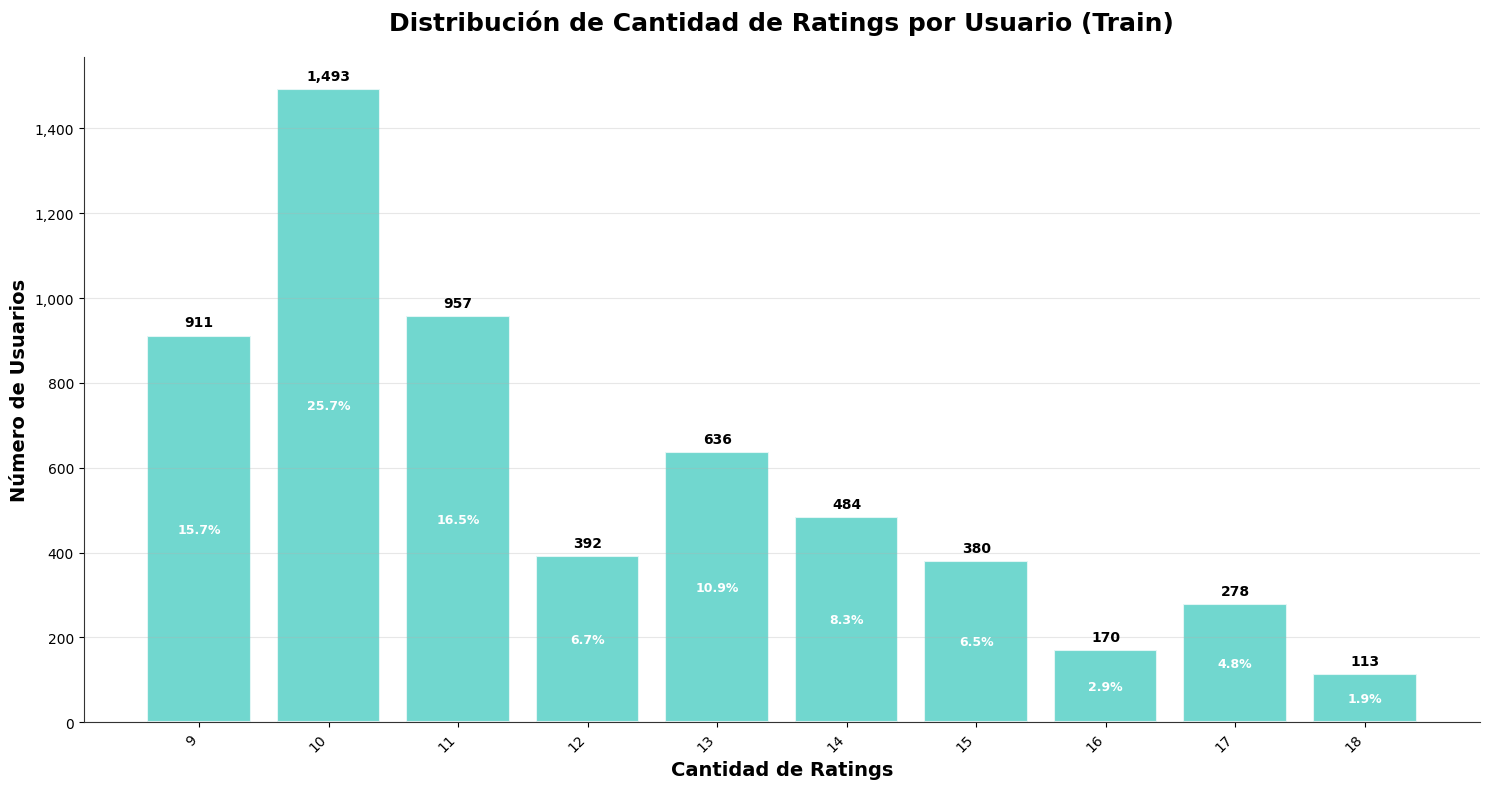

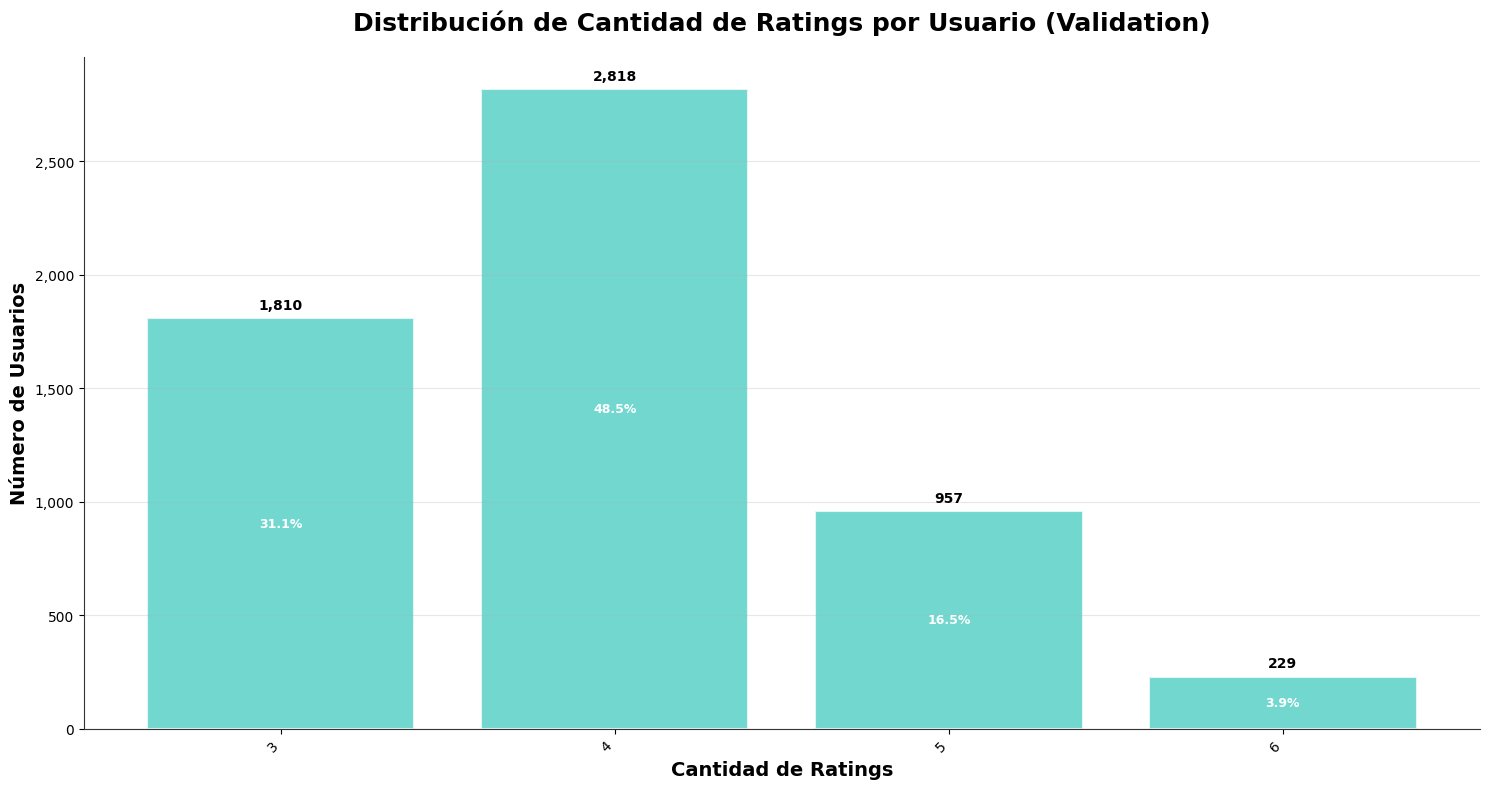

In [58]:
# Distribucion de cantidad de ratings en train y validation por usuario
frecuencia_numero_ratings_train = cantidad_ratings_usuario_train.value_counts()
frecuencia_numero_ratings_validation = cantidad_ratings_usuario_validation.value_counts()

plot_long_tail_distribution(frecuencia_numero_ratings_train,
                             title='Distribución de Cantidad de Ratings por Usuario (Train)',
                             xlabel='Cantidad de Ratings',
                             ylabel='Número de Usuarios')

plot_long_tail_distribution(frecuencia_numero_ratings_validation,
                             title='Distribución de Cantidad de Ratings por Usuario (Validation)',
                             xlabel='Cantidad de Ratings',
                             ylabel='Número de Usuarios')

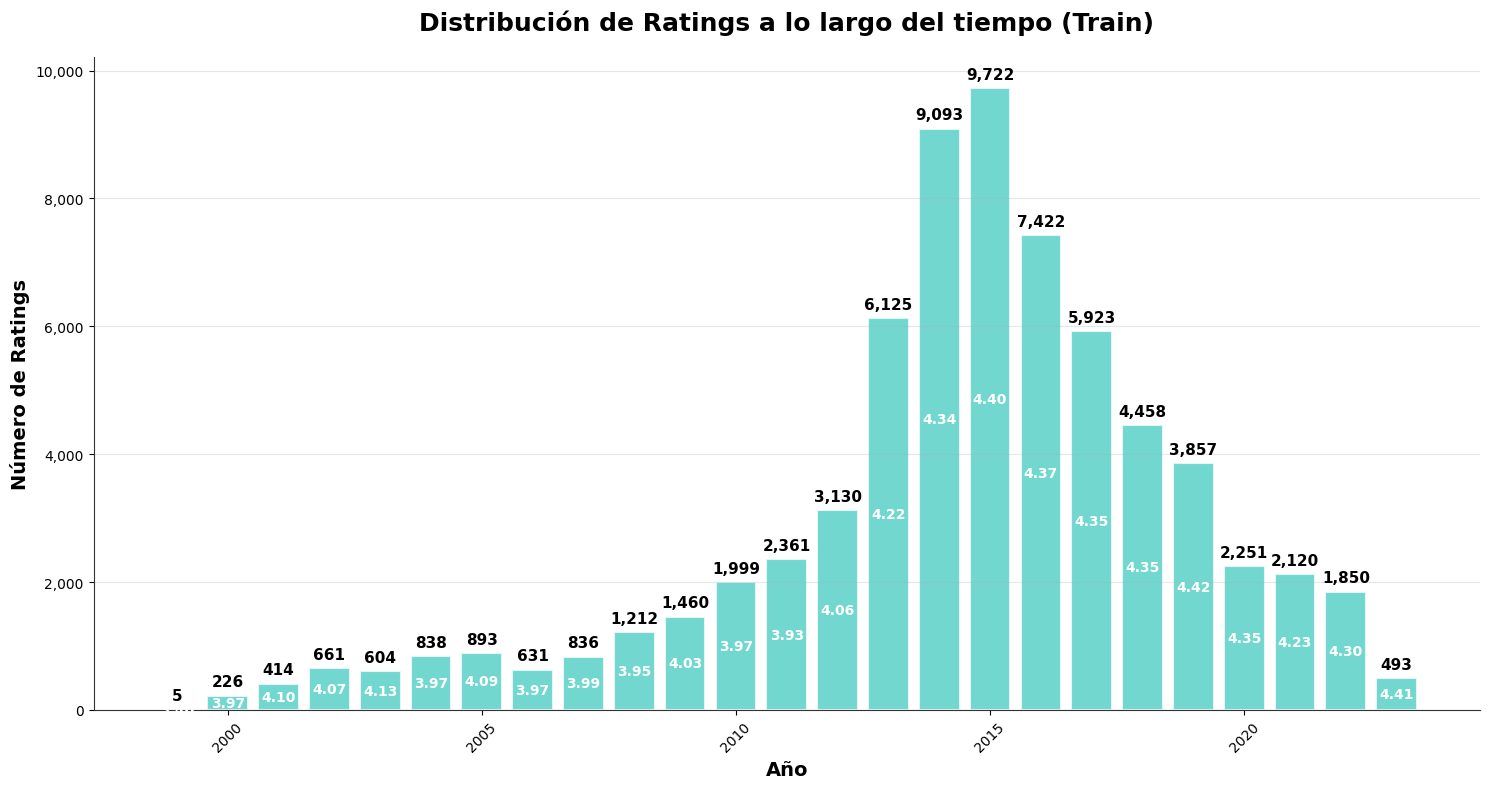

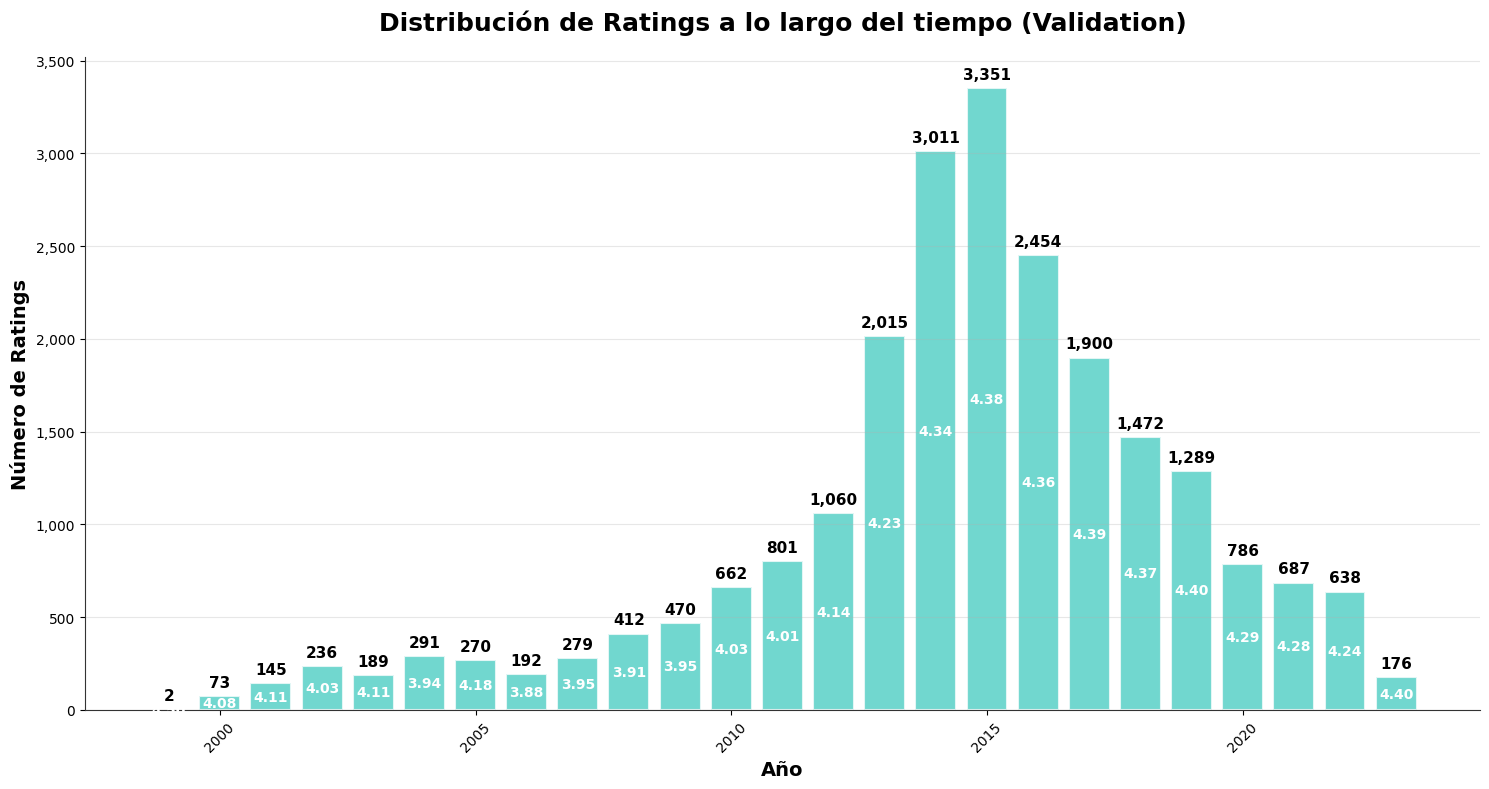

In [59]:
# Distribución temporal de los ratings
plot_ratings_over_time(train_data, title="Distribución de Ratings a lo largo del tiempo (Train)")
plot_ratings_over_time(validation_data, title="Distribución de Ratings a lo largo del tiempo (Validation)")

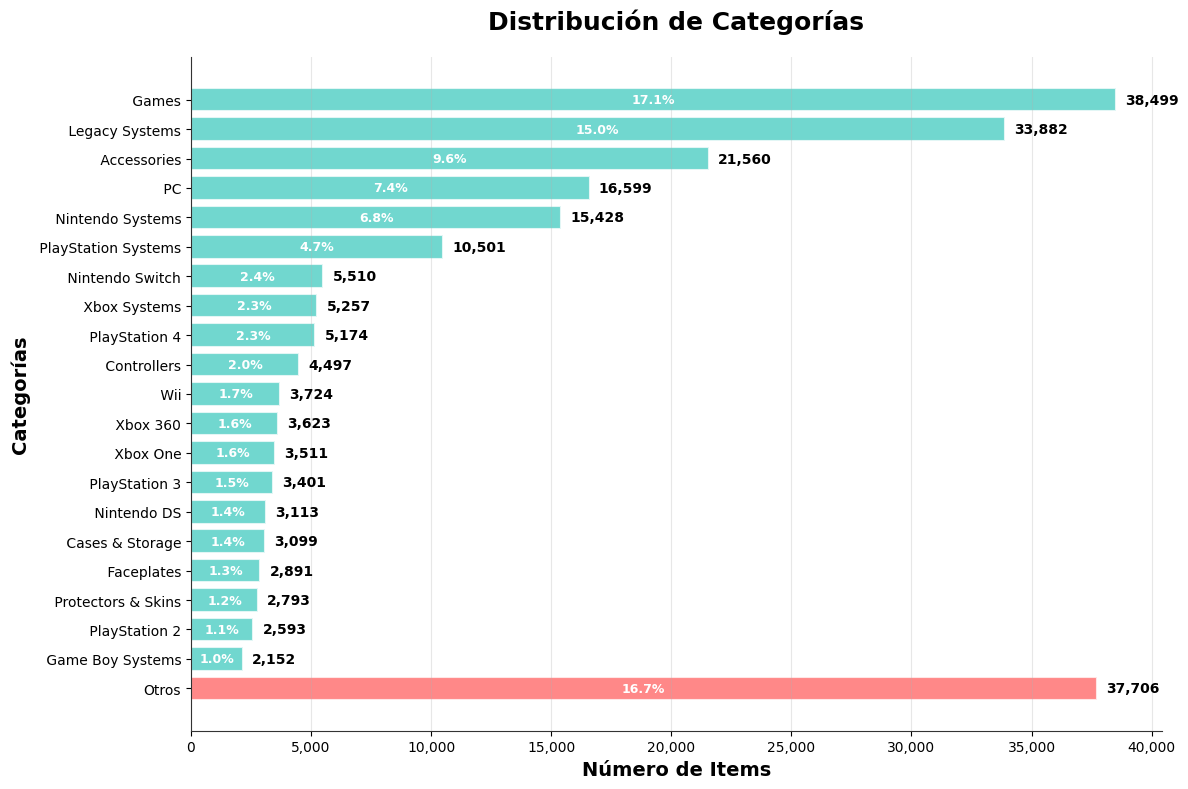

In [60]:
# Popularidad categorias
popularidad_categorias = analizar_categorias(vg_data)
plot_categories_distribution(popularidad_categorias)

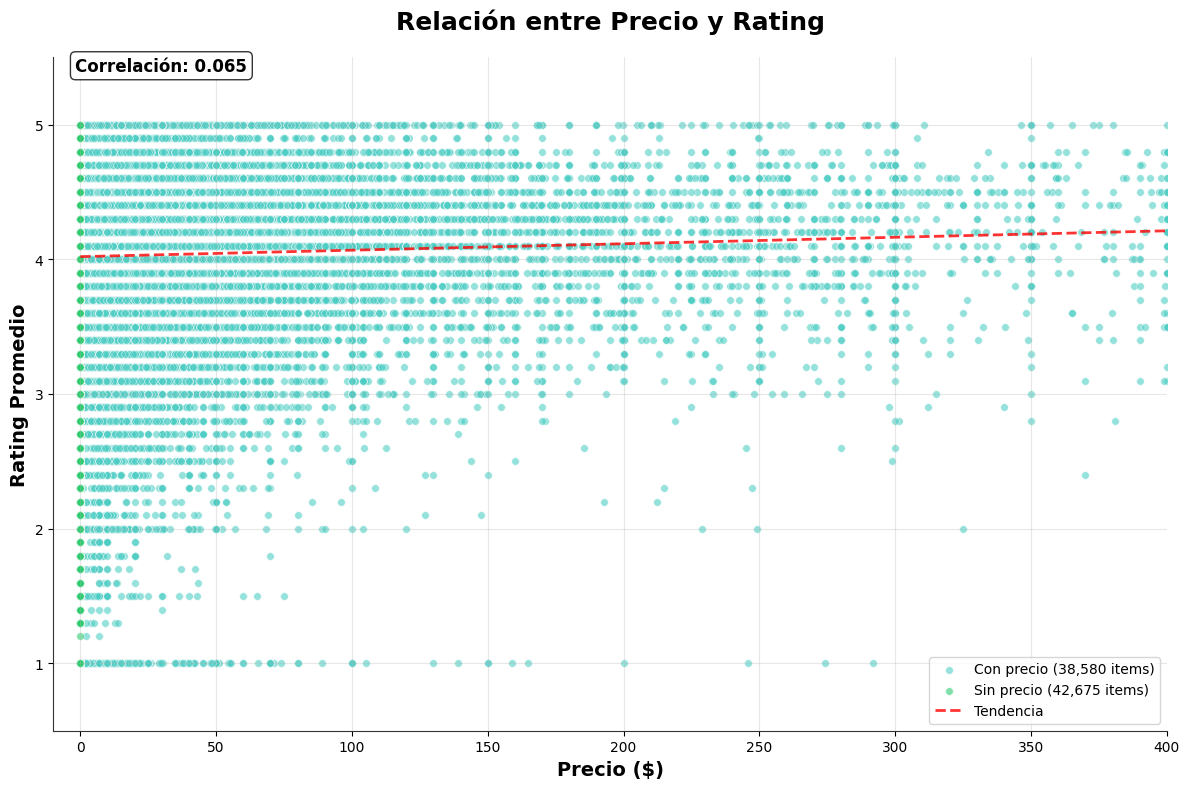

Número de items con precio: 38,580
Precio promedio: $51.17
Rating promedio (con precio): 4.04
Correlación precio-rating: 0.065
Número de items sin precio: 42,675
Rating promedio (sin precio): 3.86


In [61]:
# Precio vs rating
plot_price_vs_rating(vg_data)